<a href="https://colab.research.google.com/github/Orrm23/DeepSeek-Coder/blob/main/25_WebAdOptimization_UpperConfidenceBound_ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25_WebAdOptimization_UpperConfidenceBound_ReinforcementLearning

### Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


### Importing the dataset

In [3]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


### Upper Confidence Bound

In [4]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads
sums_of_rewards_of_each_ads = [0] * no_of_Ads
total_reward = 0
for n in range(0, observations):
    ad = 0
    max_upper_bound = 0
    for i in range(0, no_of_Ads):
        if (numbers_of_selections_of_each_ads[i] > 0):
            average_reward = sums_of_rewards_of_each_ads[i] / numbers_of_selections_of_each_ads[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_ads[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward

print("Rewards by Ads = ",sums_of_rewards_of_each_ads)
print("Total Rewards by UCB = ",total_reward)
print("Ads selected at each round:",ads_selected)

Rewards by Ads =  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total Rewards by UCB =  2178
Ads selected at each round: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 

### Visualizing Result

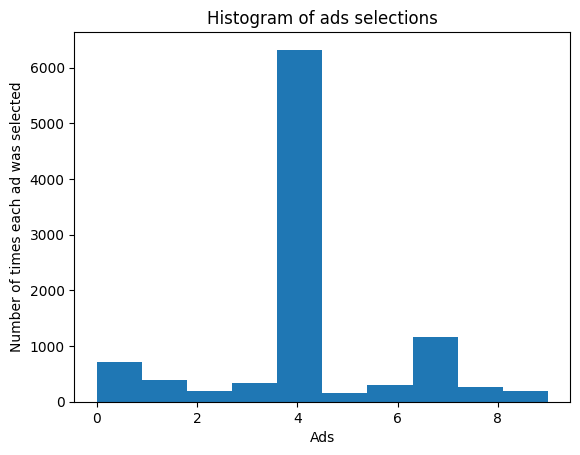

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()